In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sys
!{sys.executable} -m pip install scikit-surprise
from surprise import SVD
import surprise
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate
from surprise import KNNBasic


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 4.5 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633997 sha256=6e616035b7a70472f1e6fdab435b8c69e1af948965c6115c0f6f7eca53ecbcb2
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [3]:
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ratings_small.csv')

In [4]:
ratings.shape

(100004, 4)

In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [6]:
reader = Reader(line_format='user item rating timestamp',sep=',',skip_lines=1, rating_scale=(1, 5))
ratings_data = Dataset.load_from_file("/content/drive/MyDrive/Colab Notebooks/ratings_small.csv",reader)
svd = SVD(biased = False)

In [7]:
#Probabilistic Matrix Factorization
PMF = cross_validate(svd, ratings_data, measures=['RMSE', 'MAE'],cv=5,verbose = True)
print('Probabilistic Matrix Factorization Results : ',PMF)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0148  1.0033  0.9961  1.0100  1.0164  1.0081  0.0076  
MAE (testset)     0.7837  0.7778  0.7701  0.7796  0.7851  0.7793  0.0053  
Fit time          10.59   4.94    4.97    4.90    5.02    6.08    2.25    
Test time         0.36    0.30    0.14    0.14    0.13    0.21    0.10    
Probabilistic Matrix Factorization Results :  {'test_rmse': array([1.0147679 , 1.00333359, 0.9960639 , 1.01004894, 1.01642237]), 'test_mae': array([0.78372239, 0.77775282, 0.77013692, 0.77963696, 0.78509329]), 'fit_time': (10.586776971817017, 4.938286304473877, 4.966803550720215, 4.898239374160767, 5.017388582229614), 'test_time': (0.35564303398132324, 0.29939794540405273, 0.1391587257385254, 0.13823580741882324, 0.13175654411315918)}


In [8]:
PMF_results = pd.DataFrame.from_dict(PMF)
print("Average PMF MAE value", PMF_results['test_mae'].mean())
print("Average PMF RMSE value", PMF_results['test_rmse'].mean())

Average PMF MAE value 0.7792684766729763
Average PMF RMSE value 1.0081273402054678


In [9]:
#User based Collaborative Filtering
sim_options = {'user_based': True }
ub = KNNBasic(sim_options=sim_options)
user_based = cross_validate(ub,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('User based Collaborative Filtering results : ', user_based)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9691  0.9628  0.9687  0.9769  0.9641  0.9683  0.0050  
MAE (testset)     0.7444  0.7415  0.7457  0.7505  0.7394  0.7443  0.0038  
Fit time          0.15    0.17    0.16    0.23    0.16    0.18    0.03    
Test time         1.65    1.57    2.45    2.30    1.58    1.91    0.38    
User based Collaborative Filtering results :  {'test_rmse': array([0.96911787, 0.96276856, 0.96873588, 0.97694017, 0.96407977]), 'test_mae': array([0.74442021, 0.74154517, 0.74565893, 0.75053659, 0.739

In [10]:
user_based_results = pd.DataFrame.from_dict(user_based)
print("Average User Based MAE value", user_based_results['test_mae'].mean())
print("Average User Based RMSE value", user_based_results['test_rmse'].mean())

Average User Based MAE value 0.7443096528905552
Average User Based RMSE value 0.9683284500074348


In [11]:
#Item based Collaborative Filtering
sim_options = {'user_based': False }
ib = KNNBasic(sim_options=sim_options)
item_based = cross_validate(ib,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('item based results -', item_based)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9313  0.9380  0.9301  0.9455  0.9340  0.9358  0.0056  
MAE (testset)     0.7164  0.7239  0.7184  0.7297  0.7196  0.7216  0.0047  
Fit time          4.86    4.54    4.42    4.63    5.32    4.75    0.32    
Test time         7.01    7.02    7.62    7.12    7.10    7.18    0.23    
item based results - {'test_rmse': array([0.93134778, 0.93804738, 0.93009452, 0.94545868, 0.93397234]), 'test_mae': array([0.71639096, 0.72394218, 0.71842094, 0.72967265, 0.71959684]), 'fit_time': (4.8

In [12]:
item_based_results = pd.DataFrame.from_dict(item_based)
print("Average Item Based MAE value", item_based_results['test_mae'].mean())
print("Average Item Based RMSE value", item_based_results['test_rmse'].mean())

Average Item Based MAE value 0.7216047159870382
Average Item Based RMSE value 0.935784140334681


In [17]:
#cosine user based
sim_options = {'name':'cosine','user_based': True }
cosine = KNNBasic(sim_options=sim_options)
cosine_ub = cross_validate(cosine,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('Impact of Cosine on User Based Collaborative Filtering is :', cosine_ub)

#cosine item based
sim_options = {'name':'cosine','user_based': False }
cosine_ib = KNNBasic(sim_options=sim_options)
cosine_ib_results = cross_validate(cosine_ib,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('Impact of Cosine on Item Based Collaborative Filtering is : ', cosine_ib_results)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9989  0.9861  0.9999  0.9940  0.9876  0.9933  0.0056  
MAE (testset)     0.7699  0.7651  0.7723  0.7655  0.7643  0.7674  0.0031  
Fit time          0.62    0.41    0.40    0.42    0.41    0.45    0.09    
Test time         1.60    1.77    1.60    1.72    1.63    1.66    0.07    
Impact of Cosine on User Based Collaborative Filtering is : {'test_rmse': array([0.99894351, 0.98612102, 0.99987606, 0.9939574 , 0.98764714]), 'test_mae': array([0.76993742, 0.76507531, 

In [18]:
#msd user based
sim_options = {'name':'msd','user_based': True }
msd = KNNBasic(sim_options=sim_options)
msd_ub = cross_validate(msd,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('Impact of MSD on User Based Collaborative Filtering is : ', msd_ub)

#msd item based
sim_options = {'name':'msd','user_based': False }
msd_ib = KNNBasic(sim_options=sim_options)
msd_ib_results = cross_validate(msd_ib,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('Impact of MSD on Item Based Collaborative Filtering is : ', msd_ib_results)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9677  0.9739  0.9612  0.9566  0.9787  0.9676  0.0081  
MAE (testset)     0.7438  0.7467  0.7406  0.7358  0.7509  0.7435  0.0052  
Fit time          0.15    0.19    0.17    0.17    0.17    0.17    0.01    
Test time         1.74    1.63    1.73    1.59    1.73    1.69    0.06    
Impact of MSD on User Based Collaborative Filtering is :  {'test_rmse': array([0.96768822, 0.97387246, 0.96115466, 0.95657611, 0.97868242]), 'test_mae': array([0.74380945, 0.74666633, 0.74056618, 0.735

In [19]:
#pearson user based
sim_options = {'name':'pearson_baseline','user_based': True }
pb = KNNBasic(sim_options=sim_options)
pb_ub = cross_validate(pb,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('Impact of Pearson similarities on User Based Collaborative Filtering is : ', pb_ub)

#pearson item based
sim_options = {'name':'pearson_baseline','user_based': False }
pb_ib = KNNBasic(sim_options=sim_options)
pb_ib_results = cross_validate(pb_ib,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('Impact of Pearson similarities on Iteam Based Collaborative Filtering is : ', pb_ib_results)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9912  1.0000  1.0019  0.9987  0.9908  0.9965  0.0046  
MAE (testset)     0.7654  0.7725  0.7721  0.7714  0.7648  0.7692  0.0034  
Fit time          0.85    0.77    0.77    0.77    0.77    0.78    0.03    
Test time         1.69    1.49    1.64    1.49    1.67  

In [20]:
similarity_names = ['cosine', 'msd', 'pearson']
metrics = ['RMSE', 'MAE']
plot = {'user_based_cf': dict(),'item_based_cf': dict()}

for name in similarity_names:
    user_based = KNNBasic(sim_options={'name': name, 'user_based': True})
    item_based = KNNBasic(sim_options={'name': name, 'user_based': False})   
    total_user_based = cross_validate(user_based, ratings_data, metrics, cv=5, verbose=True)
    total_item_based = cross_validate(item_based, ratings_data, metrics, cv=5, verbose=True)
    plot['user_based_cf'][name] = total_user_based
    plot['item_based_cf'][name] = total_item_based


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9935  0.9832  1.0010  1.0048  0.9922  0.9949  0.0075  
MAE (testset)     0.7682  0.7618  0.7734  0.7735  0.7672  0.7688  0.0044  
Fit time          0.36    0.40    0.41    0.43    0.39    0.40    0.02    
Test time         1.62    1.61    1.63    1.56    1.62    1.61    0.02    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity ma

In [22]:
graph = {'mae': {'cosine': [], 'msd': [],'pearson': []},'rmse': {'cosine': [],'msd': [],'pearson': []}}
for i, j in plot.items():
    for value, result in plot[i].items():
        graph['mae'][value].append(result['test_mae'].mean())
        graph['rmse'][value].append(result['test_rmse'].mean())

graph

{'mae': {'cosine': [0.7688218303524177, 0.7749747007803509],
  'msd': [0.743962680571624, 0.72186073967919],
  'pearson': [0.7729037914538432, 0.7673663917158555]},
 'rmse': {'cosine': [0.9949470681762047, 0.995232688538956],
  'msd': [0.9682257841404599, 0.9360504182459776],
  'pearson': [0.9989876131118687, 0.988407043305456]}}

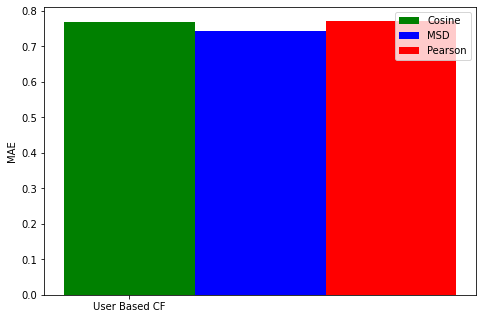

In [35]:
#mae for all similarities of user based cf
label_name = ['User Based CF']
value = np.arange(len(label_name))
fig = plt.figure()
x = fig.add_axes([0,0,1,1])
x.bar(value + 0.00, graph['mae']['cosine'][0], color = 'g', width = 0.25)
x.bar(value + 0.25, graph['mae']['msd'][0], color = 'b', width = 0.25)
x.bar(value + 0.50, graph['mae']['pearson'][0], color = 'r', width = 0.25)
plt.xticks(value, label_name)
plt.ylabel("MAE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.show()

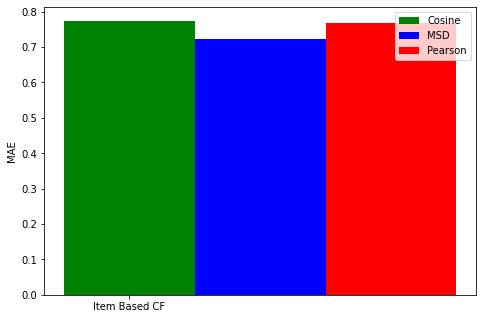

In [36]:
#mae for all similarities of item based cf
label_name = ['Item Based CF']
value = np.arange(len(label_name))
fig = plt.figure()
x = fig.add_axes([0,0,1,1])
x.bar(value + 0.00, graph['mae']['cosine'][1], color = 'g', width = 0.25)
x.bar(value + 0.25, graph['mae']['msd'][1], color = 'b', width = 0.25)
x.bar(value + 0.50, graph['mae']['pearson'][1], color = 'r', width = 0.25)
plt.xticks(value, label_name)
plt.ylabel("MAE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.show()

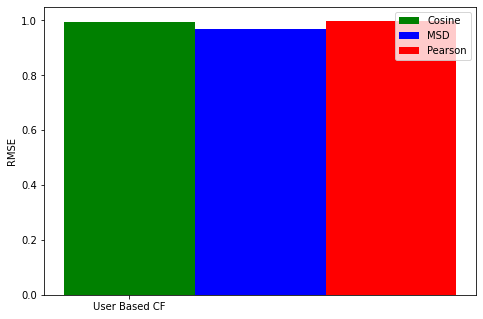

In [37]:
#RMSE for all similarities of user based cf
label_name = ['User Based CF']
value = np.arange(len(label_name)) 
fig = plt.figure()
x = fig.add_axes([0,0,1,1])
x.bar(value + 0.00, graph['rmse']['cosine'][0], color = 'g', width = 0.25)
x.bar(value + 0.25, graph['rmse']['msd'][0], color = 'b', width = 0.25)
x.bar(value + 0.50, graph['rmse']['pearson'][0], color = 'r', width = 0.25)
plt.xticks(value, label_name)
plt.ylabel("RMSE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.show()

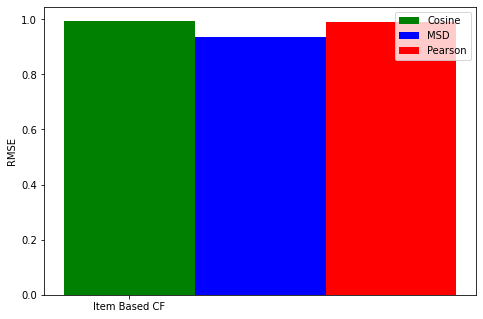

In [38]:
#RMSE for all similarities of Item based cf
label_name = ['Item Based CF']
value = np.arange(len(label_name))
fig = plt.figure()
x = fig.add_axes([0,0,1,1])
x.bar(value + 0.00, graph['rmse']['cosine'][1], color = 'g', width = 0.25)
x.bar(value + 0.25, graph['rmse']['msd'][1], color = 'b', width = 0.25)
x.bar(value + 0.50, graph['rmse']['pearson'][1], color = 'r', width = 0.25)
plt.xticks(value, label_name)
plt.ylabel("RMSE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.show()

In [39]:
k_start = 1
mean = 2000
user_based_results = []
measures = ['RMSE', 'MAE']
for i in range(1,100):
    knn_user_based = KNNBasic(sim_options={'user_based': True}, k=i)
    cv_user_based = cross_validate(knn_user_based, ratings_data, measures, verbose=True, cv=5)
    start_mean = cv_user_based['test_rmse'].mean()
    if start_mean < mean:
        mean = start_mean
        k_start = i
    user_based_results.append(start_mean)
    print(i)
print(k_start, mean)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1962  1.2148  1.2183  1.2096  1.2137  1.2105  0.0077  
MAE (testset)     0.8931  0.9069  0.9109  0.8998  0.9043  0.9030  0.0061  
Fit time          0.15    0.19    0.18    0.19    0.19    0.18    0.02    
Test time         0.91    1.16    0.91    1.14    0.91    1.01    0.12    
1
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing

In [40]:
k_start = 1
mean = 2000
item_based_results = []
measures = ['RMSE', 'MAE']

for i in range(1,100):
    knn_item_based = KNNBasic(sim_options={'user_based': False}, k=i)
    cv_item_based = cross_validate(knn_item_based, ratings_data, measures, verbose=True, cv=5)

    start_mean = cv_item_based['test_rmse'].mean()
    if start_mean < mean:
        mean = start_mean
        k_start = i
    item_based_results.append(start_mean)
    print(i)
print(k_start, mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3024  1.3081  1.3038  1.2979  1.3074  1.3039  0.0037  
MAE (testset)     0.9638  0.9704  0.9650  0.9596  0.9674  0.9653  0.0036  
Fit time          6.35    5.11    6.20    10.91   6.77    7.07    2.00    
Test time         5.07    6.68    5.86    5.24    6.13    5.80    0.59    
1
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing

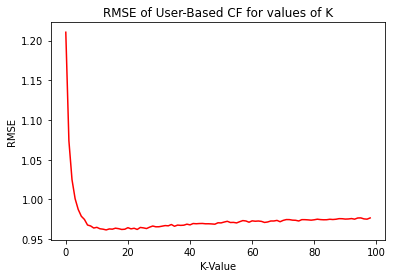

In [42]:
plt.plot(user_based_results, color = 'red')
plt.xlabel("K-Value")
plt.ylabel("RMSE")
plt.title("RMSE of User-Based CF for values of K")
plt.show()

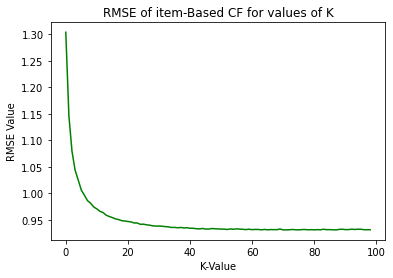

In [44]:
plt.plot(item_based_results, color = 'green')
plt.xlabel("K-Value")
plt.ylabel("RMSE Value")
plt.title("RMSE of item-Based CF for values of K")
plt.show()

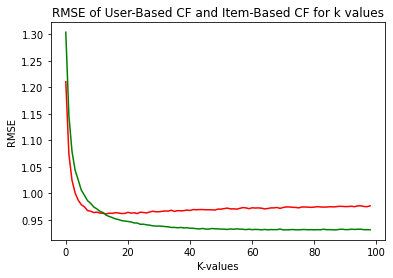

In [45]:
plt.plot(user_based_results, color = 'red')
plt.plot(item_based_results, color='green')
plt.xlabel("K-values")
plt.ylabel("RMSE")
plt.title("RMSE of User-Based CF and Item-Based CF for k values")
plt.show()